## Midterm Exam
**Student**: Pratyush Sudhakar (ps2245) \
**Due**: March 20, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import qr

### Question 1

In [2]:
def compute_expression(x):
    if x < 1e-8:
        return np.tan(x / 2)
    return 1 / np.sin(x) - np.cos(x) / np.sin(x)


xs = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-4, 1e-1, 1, 2, 3, 4, 8]

for x in xs:
    tan_res = compute_expression(x)
    inaccurate = 1 / np.sin(x) - np.cos(x) / np.sin(x)
    if x == 1e-10:
        print("--------------------------------------------")
        print(f"x = {x}, tan_res = {tan_res}, inaccurate = {inaccurate}")
        print("--------------------------------------------")
    print(f"x = {x}, tan_res = {tan_res}, inaccurate = {inaccurate}")

x = 1e-12, tan_res = 5e-13, inaccurate = 0.0
x = 1e-11, tan_res = 5e-12, inaccurate = 0.0
--------------------------------------------
x = 1e-10, tan_res = 5e-11, inaccurate = 0.0
--------------------------------------------
x = 1e-10, tan_res = 5e-11, inaccurate = 0.0
x = 1e-09, tan_res = 5e-10, inaccurate = 0.0
x = 1e-08, tan_res = 0.0, inaccurate = 0.0
x = 0.0001, tan_res = 4.999999873689376e-05, inaccurate = 4.999999873689376e-05
x = 0.1, tan_res = 0.05004170837553801, inaccurate = 0.05004170837553801
x = 1, tan_res = 0.5463024898437905, inaccurate = 0.5463024898437905
x = 2, tan_res = 1.5574077246549023, inaccurate = 1.5574077246549023
x = 3, tan_res = 14.10141994717172, inaccurate = 14.10141994717172
x = 4, tan_res = -2.185039863261519, inaccurate = -2.185039863261519
x = 8, tan_res = 1.1578212823495777, inaccurate = 1.1578212823495777


### Question 4

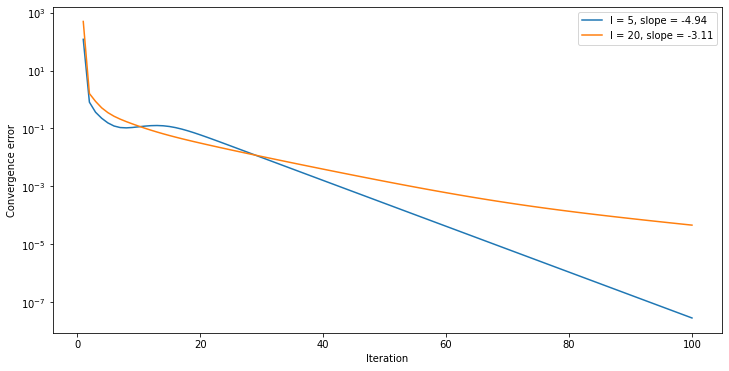

In [32]:
def build_matrix(n):
    n = 100
    Z = np.random.rand(n, n)
    Q, R = np.linalg.qr(Z)
    Lambda = np.diag([1 / (i + 1) for i in range(n)])
    A = Q @ Lambda @ Q.T
    return A, Q, Lambda


evectors = [5, 20]


def simultaneous_iteration(A, l, n_iter=100):
    """
    Performs simultaneous iteration to approximate the first l eigenvectors of matrix A.

    Parameters:
        A (numpy.ndarray): The symmetric matrix.
        l (int): The number of eigenvectors to approximate.
        n_iter (int): The number of iterations to perform.

    Returns:
        A list of convergence errors for each iteration.
    """
    errors = []
    n = A.shape[0]
    X = np.random.rand(n, l)
    for _ in range(n_iter):
        Z = A @ X
        X_new, R = qr(Z)
        errors.append(np.linalg.norm(X_new - X @ (X.T @ X_new)))
        X = X_new
    return errors


# plot the convergence errors
# Run simultaneous iteration for l = 5 and l = 20
A, Q, Lambda = build_matrix(100)
convergence_l_5 = simultaneous_iteration(A, 5)
convergence_l_20 = simultaneous_iteration(A, 20)

slope_5 = np.polyfit(np.log(range(1, len(convergence_l_5) + 1)), np.log(convergence_l_5), 1)[0]
slope_20 = np.polyfit(np.log(range(1, len(convergence_l_20) + 1)), np.log(convergence_l_20), 1)[0]

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(convergence_l_5) + 1), convergence_l_5, label=f"l = 5, slope = {slope_5:.2f}")
plt.plot(range(1, len(convergence_l_20) + 1), convergence_l_20, label=f"l = 20, slope = {slope_20:.2f}")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Convergence error")
plt.legend()
plt.show()

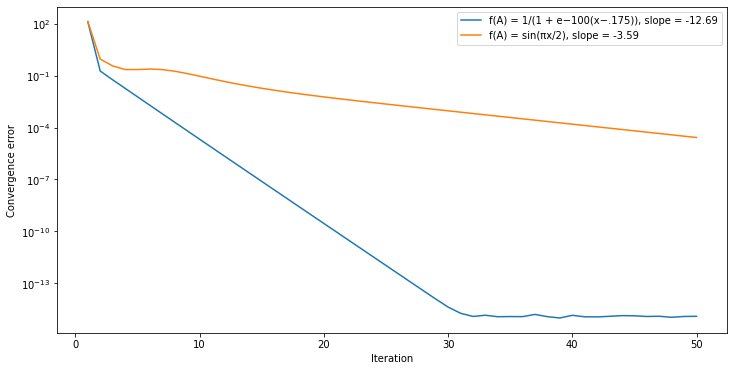

In [36]:
"""
Given a square matrix A and some scalar function f the eigenvalues of f (A) are f (λi),
where λi are the eigenvalues of A and the eigenvectors are unchanged (i.e., if (λ, v) is an
eigenvalue/vector pair for A then (f (λ), v) is an eigenvalue/vector pair for f (A)).1 Let’s
assume you are able to run subspace iteration on f (A) instead of A for any function f and
someone suggests the following two possible functions:
(1) f (x) = sin(πx/2)
(2) f (x) = 1/(1 + e−100(x−.175)).
For the problem in part (a) with ` = 5, would running subspace iteration with these functions
help us converge to V1 in fewer iterations? Please answer the question for both functions and
justify your response.
"""

# f(x) = sin(πx/2)
# f(x) = 1/(1 + e−100(x−.175))

# f(A)
A, Q, Lambda = build_matrix(100)
fA1 = np.sin(np.pi * Lambda / 2)
fA2 = 1 / (1 + np.exp(-100 * (Lambda - 0.175)))

# Update the matrix A to f(A)
A_f1 = Q @ fA1 @ Q.T
A_f2 = Q @ fA2 @ Q.T

# Run subspace iteration for f(A)
convergence_fA1 = simultaneous_iteration(A_f1, 5, 50)
convergence_fA2 = simultaneous_iteration(A_f2, 5, 50)

slope_fA1 = np.polyfit(np.log(range(1, len(convergence_fA1) + 1)), np.log(convergence_fA1), 1)[0]
slope_fA2 = np.polyfit(np.log(range(1, len(convergence_fA2) + 1)), np.log(convergence_fA2), 1)[0]


plt.figure(figsize=(12, 6))
plt.plot(range(1, len(convergence_fA2) + 1), convergence_fA2, label=f"f(A) = 1/(1 + e−100(x−.175)), slope = {slope_fA2:.2f}")
plt.plot(
    range(1, len(convergence_fA1) + 1),
    convergence_fA1,
    label=f"f(A) = sin(πx/2), slope = {slope_fA1:.2f}",
)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Convergence error")
plt.legend()
plt.show()